---

Compute the Skew-Stickiness Ratio (SSR) using the characteristic function of 
the model.

---

Let $\varphi_t(T;a) = \mathbb{E}_t[e^{iaX_T}]$ be the characteristic 
function of the log-price $X_T=\log S_T$ at time $t$ for a fixed maturity $T$ 
and real number $a$.

Let $\psi = \log \varphi$. Then, from [[Friz, Gatheral, 2025, Proposition 3.1](https://doi.org/10.1080/14697688.2025.2486173)],
the SSR at time $t$ for maturity $T$ is given by

$$
    \mathcal{R}_t(T) = -
    \frac{\int_{\mathbb{R}^+}
        \frac{da}{a^2 + \frac14}
        \Re \left[
            \rho D_t^\xi \psi_t(T; a-i/2)
            \exp\left(
                \psi_t(T;a-i/2)
            \right)
        \right]
    }{
        \int_{\mathbb{R}^+}
        \frac{a \, da}{a^2 + \frac14}
        \Im \left[
            \exp\left(
                \psi_t(T;a-i/2)
            \right)
        \right]
    }.
$$

In [31]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from heston import ssr_heston_charfunc, ssr_heston_forest

sns.set_theme("talk")
mpl.rcParams["figure.figsize"] = (8, 6)
SEED = 1234

## The classical Heston SSR

Consider the Heston model:

$$
\begin{aligned}
    dS_t &= S_t \sqrt{V_t} dW_t, \\
    dV_t &= \kappa(\bar{V} - V_t) dt + \eta \sqrt{V_t} dZ_t, \\
    d\langle W, Z \rangle_t &= \rho dt.
\end{aligned}
$$

We compute the SSR in the Heston model using its characteristic function.

In [33]:
params = {
    "v0": 0.4**2,
    "kappa": 0.0,
    "vbar": 0.4**2,
    "eta": 0.6,
    "rho": -0.8,
}

In [34]:
taus = np.linspace(1e-4, 3, 100)
ssr_values = np.array([ssr_heston_charfunc(tau=tau, params=params) for tau in taus])

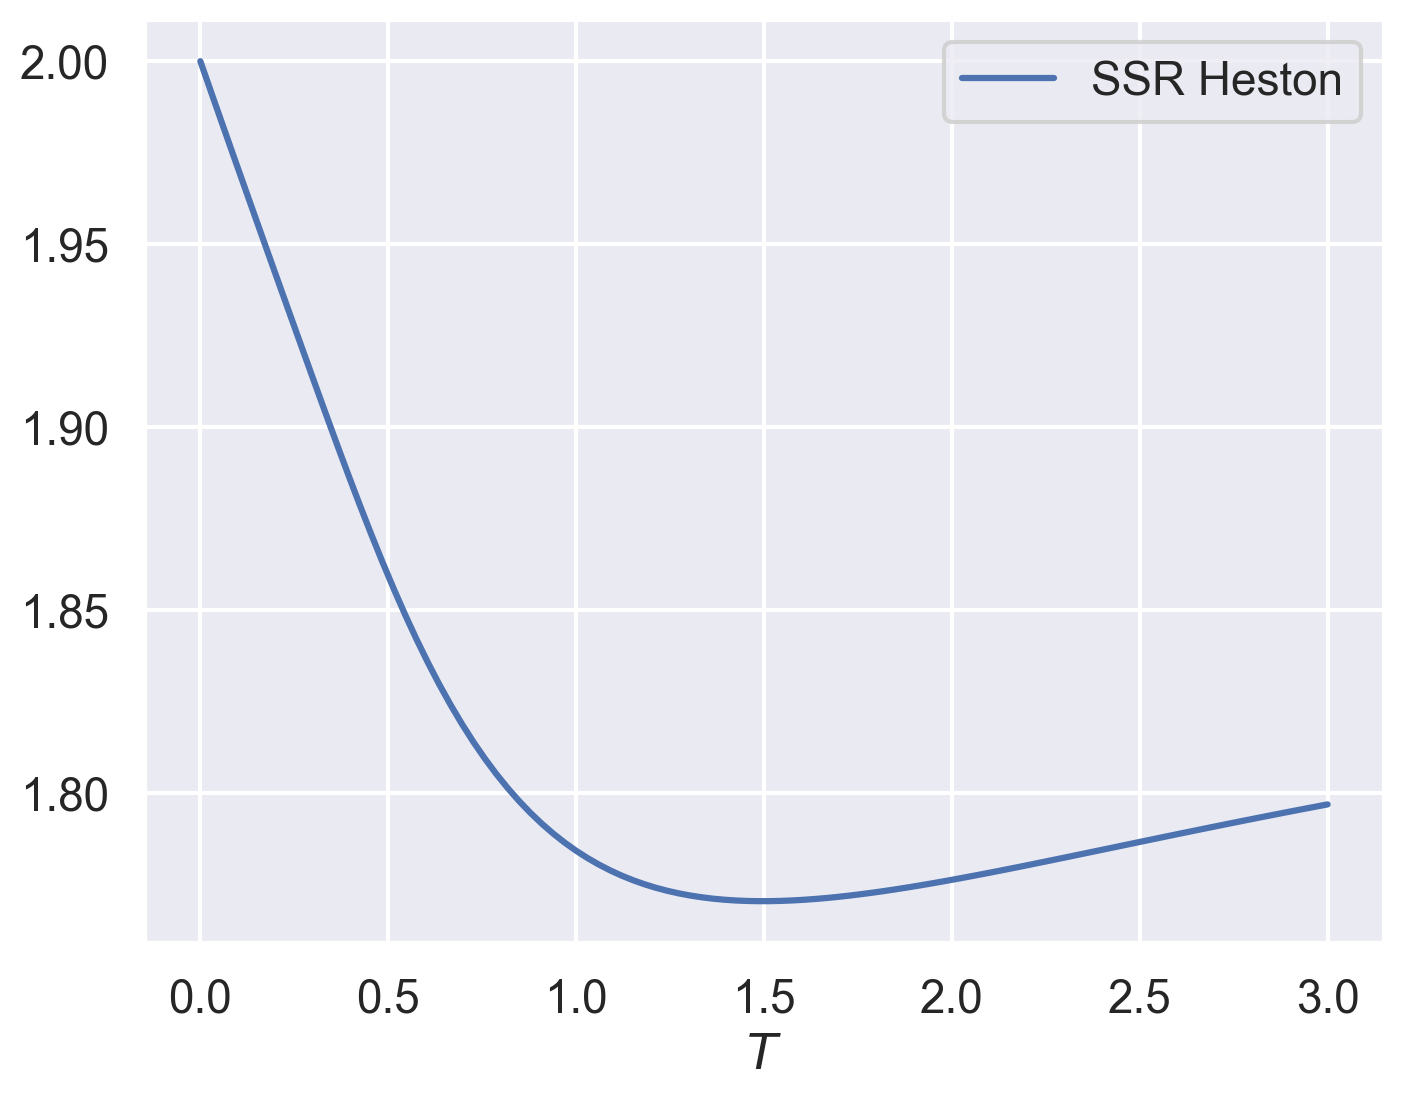

In [35]:
fig, ax = plt.subplots()
ax.plot(taus, ssr_values, label="SSR Heston")
ax.set_xlabel("$T$")
ax.legend()
plt.show()

Testing forest expansion

In [36]:
params = {
    "v0": 0.4**2,
    "kappa": 0.0,
    "vbar": 0.4**2,
    "eta": 0.6,
    "rho": -0.8,
}

In [37]:
taus = np.linspace(1e-4, 3, 100)

ssr_cf = np.array([ssr_heston_charfunc(tau=tau, params=params) for tau in taus])
ssr_forest = ssr_heston_forest(tau=taus, params=params)

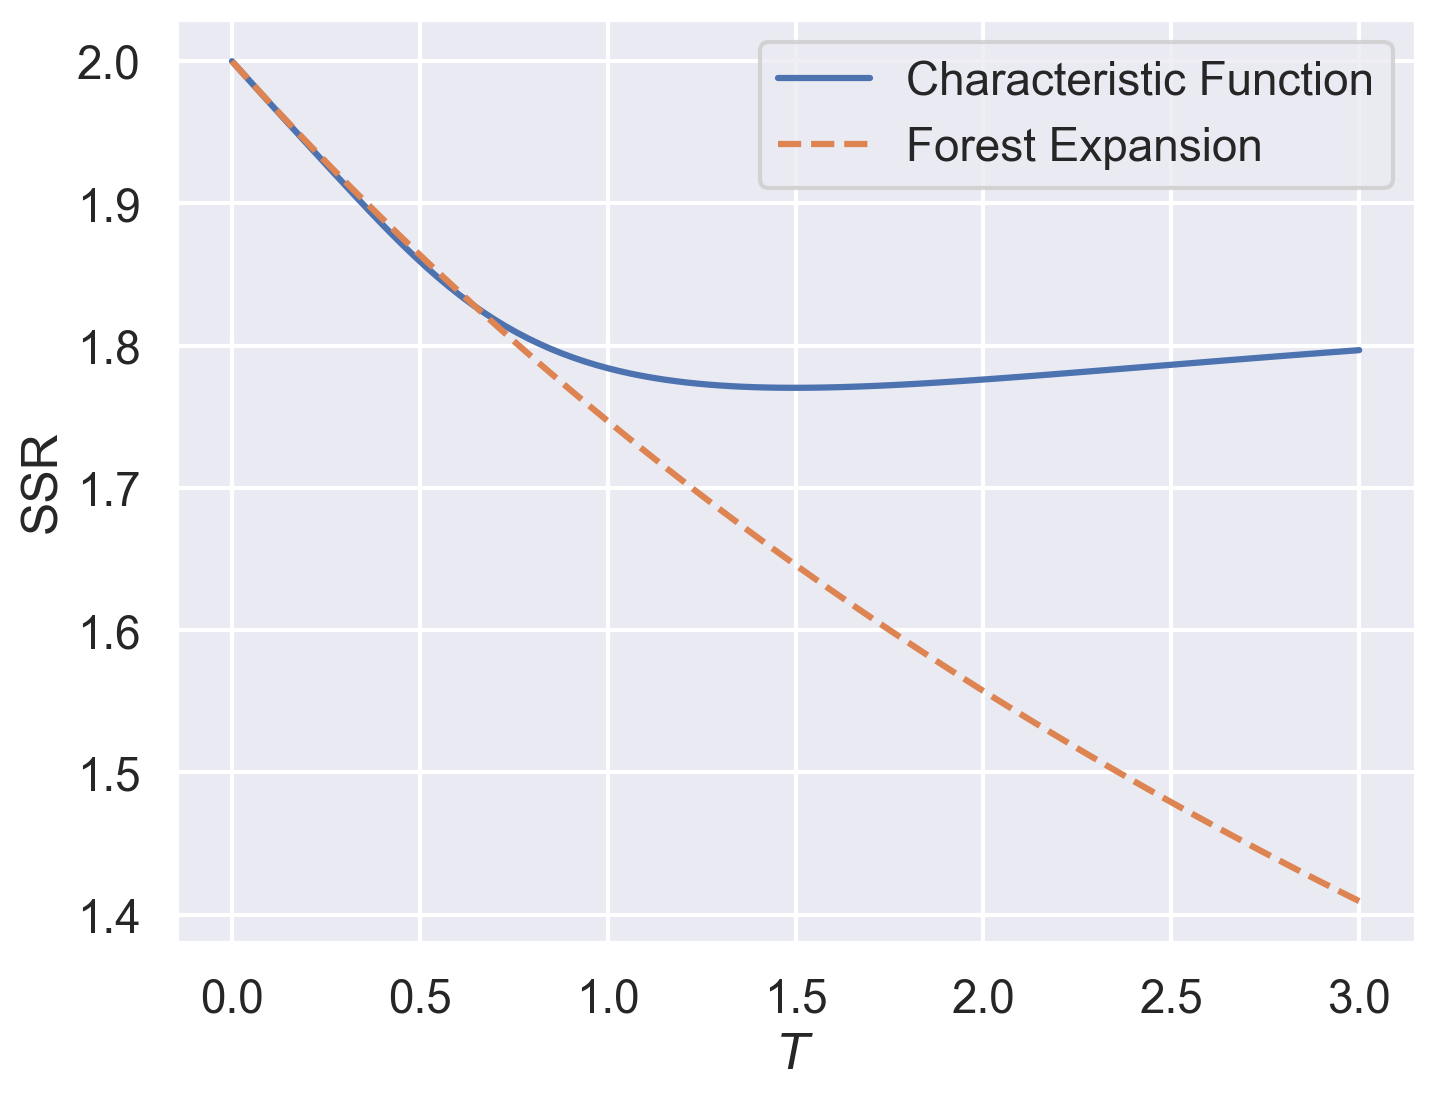

In [38]:
fig, ax = plt.subplots()
ax.plot(taus, ssr_cf, label="Characteristic Function")
ax.plot(taus, ssr_forest, label="Forest Expansion", linestyle="--")
ax.set_xlabel("$T$")
ax.set_ylabel("SSR")
ax.legend()
plt.show()

## The rough Heston SSR